In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as hcluster
from sklearn.cluster import AgglomerativeClustering

In [2]:
pay_gap_df=pd.read_csv('pay_gap_Europe.csv')

In [3]:
pay_gap_df.head(5)

,Country,Clean-Country,Year,GDP,Clean-GDP,Urban_population,Clean-Urban_pop,Industry,Industry-fillna,Clean-Industry,...,Accommodation,Information,Financial,Professional_scientific,Administrative,Public_administration,Education,Human_health,Arts,Other
0,Austria,1,2010,35390,2,57.40,1,24.0,24.0,3,...,9.9,21.2,30.3,34.0,22.5,NaN,27.8,12.0,34.0,32.0
1,Austria,1,2011,36300,2,57.12,1,23.5,23.5,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Austria,1,2012,36390,2,57.15,1,22.9,22.9,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Austria,1,2013,36180,2,57.34,1,22.3,22.3,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Austria,1,2014,36130,2,57.53,1,22.2,22.2,3,...,7.4,22.9,30.4,31.5,19.5,NaN,24.3,12.8,26.6,28.8


In [4]:
#pay_gap_df.dtypes

In [5]:
columns_to_drop=['Country','Year','GDP','Urban_population','Industry','Industry-fillna','Industry-Mean','Business','Business-mean','Business-fillna','Mining','Mining-mean','Mining-fillna','Manufacturing-mean','Manufacturing-fillna','Manufacturing','Electricity_supply','Water_supply','Construction','Retail trade','Transportation','Accommodation','Information','Financial','Professional_scientific','Administrative','Public_administration','Education','Human_health','Arts','Other']

In [6]:
pay_gap_df=pay_gap_df.drop(columns_to_drop, axis=1)

In [7]:
pay_gap_df.head(5)

,Clean-Country,Clean-GDP,Clean-Urban_pop,Clean-Industry,Clean-Business,Clean-Mining,Clean-Manufacturing
0,1,2,1,3,3,3,3
1,1,2,1,3,3,2,2
2,1,2,1,3,3,2,2
3,1,2,1,3,3,2,2
4,1,2,1,3,3,3,3


In [8]:
pay_gap_df.dtypes

Clean-Country          int64
Clean-GDP              int64
Clean-Urban_pop        int64
Clean-Industry         int64
Clean-Business         int64
Clean-Mining           int64
Clean-Manufacturing    int64
dtype: object

In [9]:
pay_gap_df.fillna(0)

,Clean-Country,Clean-GDP,Clean-Urban_pop,Clean-Industry,Clean-Business,Clean-Mining,Clean-Manufacturing
0,1,2,1,3,3,3,3
1,1,2,1,3,3,2,2
2,1,2,1,3,3,2,2
3,1,2,1,3,3,2,2
4,1,2,1,3,3,3,3
...,...,...,...,...,...,...,...
319,27,3,2,2,2,2,2
320,27,3,2,3,3,2,2
321,27,3,2,3,2,2,2
322,27,3,2,3,2,2,2


In [10]:
sex_index=[1,2]

In [11]:
corr_matrix=pay_gap_df.corr()

<AxesSubplot:>

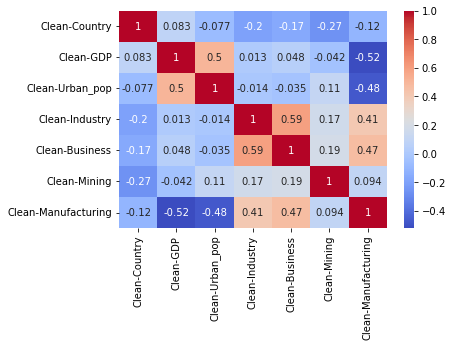

In [12]:
sns.heatmap(corr_matrix, cmap='coolwarm',annot=True)

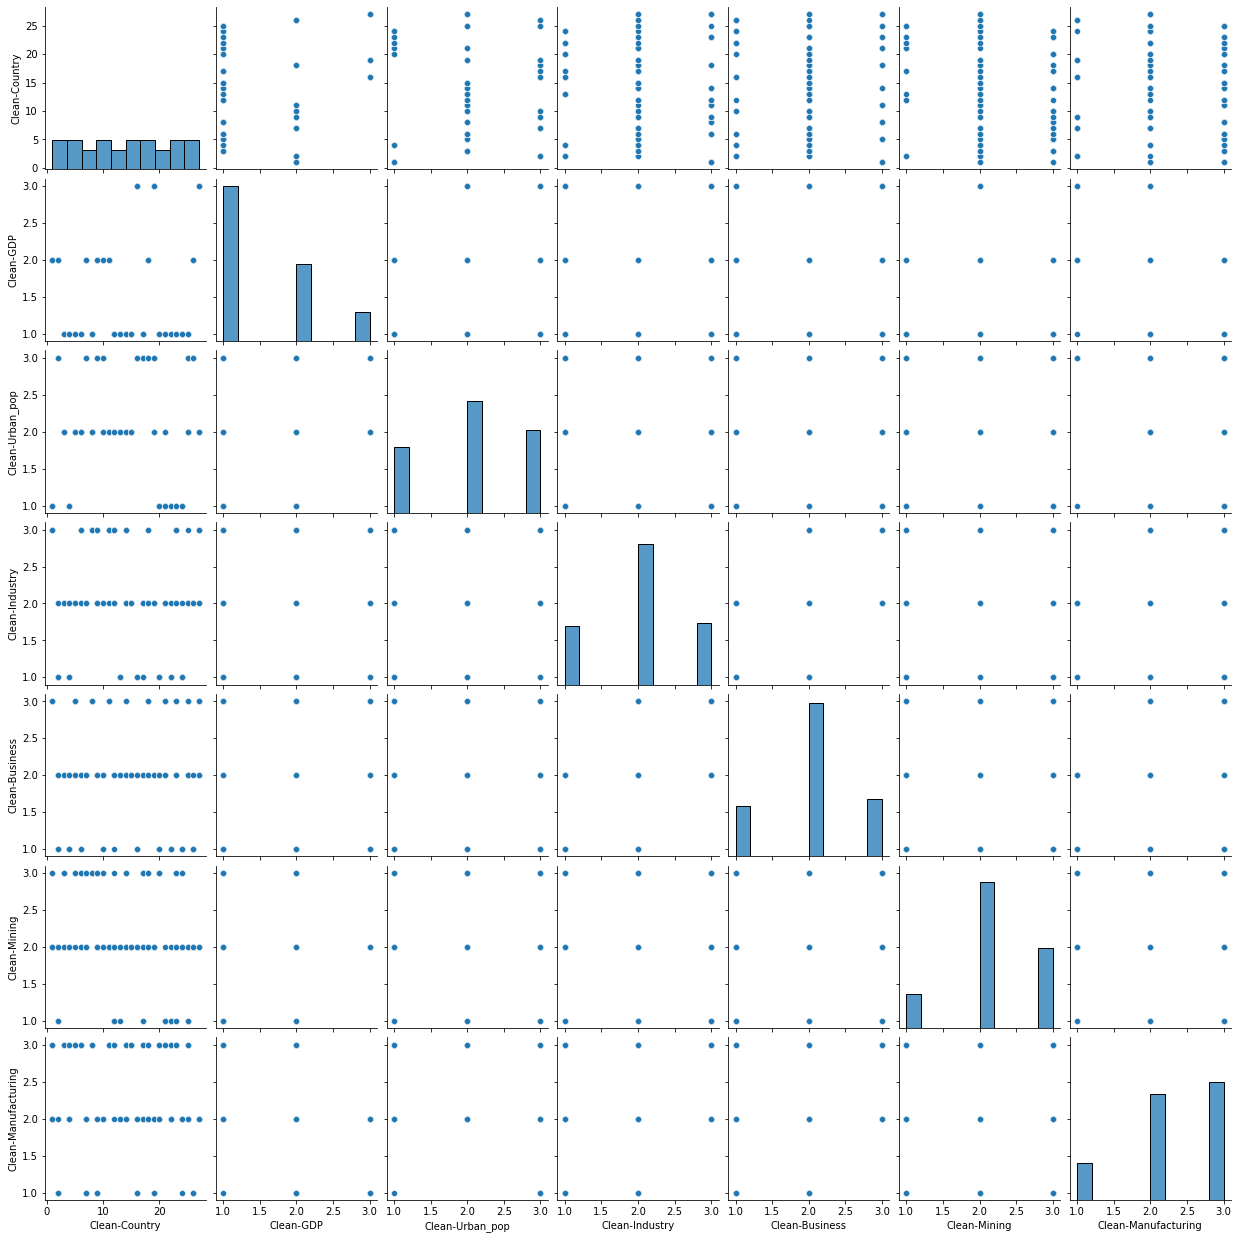

In [13]:
sns.pairplot(pay_gap_df)

In [14]:
scaling=StandardScaler()

In [15]:
scaled=scaling.fit_transform(pay_gap_df)

In [16]:
pay_gap_df.head(8)

,Clean-Country,Clean-GDP,Clean-Urban_pop,Clean-Industry,Clean-Business,Clean-Mining,Clean-Manufacturing
0,1,2,1,3,3,3,3
1,1,2,1,3,3,2,2
2,1,2,1,3,3,2,2
3,1,2,1,3,3,2,2
4,1,2,1,3,3,3,3
5,1,2,1,3,3,2,3
6,1,2,1,3,3,2,3
7,1,2,1,3,3,2,3


In [17]:
scaled_df=pd.DataFrame(scaled,columns=pay_gap_df.columns)

In [18]:
scaled_df.head()

,Clean-Country,Clean-GDP,Clean-Urban_pop,Clean-Industry,Clean-Business,Clean-Mining,Clean-Manufacturing
0,-1.669046,0.700913,-1.414374,1.451788,1.517688,1.294339,0.980346
1,-1.669046,0.700913,-1.414374,1.451788,1.517688,-0.270459,-0.437655
2,-1.669046,0.700913,-1.414374,1.451788,1.517688,-0.270459,-0.437655
3,-1.669046,0.700913,-1.414374,1.451788,1.517688,-0.270459,-0.437655
4,-1.669046,0.700913,-1.414374,1.451788,1.517688,1.294339,0.980346


<AxesSubplot:>

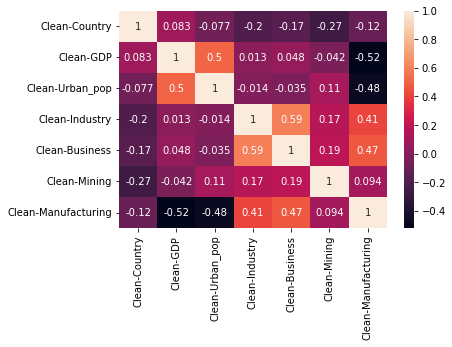

In [19]:
corr_matrix=scaled_df.corr()
sns.heatmap(corr_matrix,annot=True)

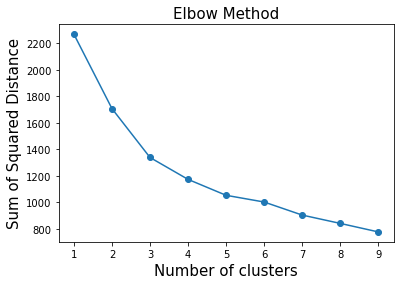

In [20]:
a=[]
K=range(1,10)
for i in K:
    kmean=KMeans(n_clusters=i)
    kmean.fit(scaled_df)
    a.append(kmean.inertia_)

plt.plot(K,a,marker='o')
plt.title('Elbow Method',fontsize=15)
plt.xlabel('Number of clusters',fontsize=15)
plt.ylabel('Sum of Squared Distance',fontsize=15)
plt.show()

In [21]:
scaled_df.describe()

,Clean-Country,Clean-GDP,Clean-Urban_pop,Clean-Industry,Clean-Business,Clean-Mining,Clean-Manufacturing
count,3.240000e+02,324.000000,3.240000e+02,3.240000e+02,3.240000e+02,3.240000e+02,3.240000e+02
mean,-2.330098e-17,0.000000,2.573387e-16,1.331025e-17,-2.518990e-16,8.227301e-16,-4.386066e-17
std,1.001547e+00,1.001547,1.001547e+00,1.001547e+00,1.001547e+00,1.001547e+00,1.001547e+00
min,-1.669046e+00,-0.754829,-1.414374e+00,-1.488083e+00,-1.594533e+00,-1.835256e+00,-1.855655e+00
25%,-8.987170e-01,-0.754829,-1.414374e+00,-1.814736e-02,-3.842248e-02,-2.704588e-01,-4.376546e-01
50%,0.000000e+00,-0.754829,-8.609233e-02,-1.814736e-02,-3.842248e-02,-2.704588e-01,-4.376546e-01
75%,8.987170e-01,0.700913,1.242189e+00,-1.814736e-02,-3.842248e-02,1.294339e+00,9.803462e-01
max,1.669046e+00,2.156655,1.242189e+00,1.451788e+00,1.517688e+00,1.294339e+00,9.803462e-01


In [22]:
kmeans=KMeans(n_clusters=5,random_state=111)

In [23]:
kmeans.fit(scaled_df)

KMeans(n_clusters=5, random_state=111)

In [24]:
pd.Series(kmeans.labels_).value_counts()

2    85
3    62
4    60
0    60
1    57
dtype: int64

In [25]:
metrics.silhouette_score(scaled_df,kmeans.labels_)

0.24292137715550174

In [26]:
cluster_labels=kmeans.fit_predict(scaled_df)

In [27]:
preds=kmeans.labels_
kmeans_df=pd.DataFrame(scaled_df)
kmeans_df['KMeans_Clusters']=preds
kmeans_df.head(10)

,Clean-Country,Clean-GDP,Clean-Urban_pop,Clean-Industry,Clean-Business,Clean-Mining,Clean-Manufacturing,KMeans_Clusters
0,-1.669046,0.700913,-1.414374,1.451788,1.517688,1.294339,0.980346,2
1,-1.669046,0.700913,-1.414374,1.451788,1.517688,-0.270459,-0.437655,2
2,-1.669046,0.700913,-1.414374,1.451788,1.517688,-0.270459,-0.437655,2
3,-1.669046,0.700913,-1.414374,1.451788,1.517688,-0.270459,-0.437655,2
4,-1.669046,0.700913,-1.414374,1.451788,1.517688,1.294339,0.980346,2
5,-1.669046,0.700913,-1.414374,1.451788,1.517688,-0.270459,0.980346,2
6,-1.669046,0.700913,-1.414374,1.451788,1.517688,-0.270459,0.980346,2
7,-1.669046,0.700913,-1.414374,1.451788,1.517688,-0.270459,0.980346,2
8,-1.669046,0.700913,-1.414374,1.451788,1.517688,-0.270459,0.980346,2
9,-1.669046,0.700913,-1.414374,1.451788,1.517688,-0.270459,0.980346,2


In [28]:
kmeans_df.to_csv('kmeans_result.csv',index=False)

/home/user/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


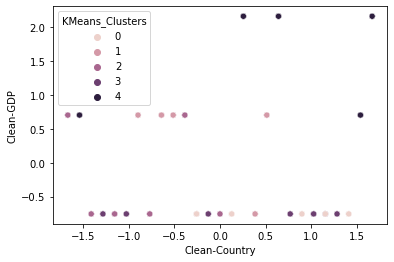

In [30]:
sns.scatterplot(kmeans_df['Clean-Country'],kmeans_df['Clean-GDP'],hue=kmeans_df['KMeans_Clusters'])
plt.show()